<a href="https://colab.research.google.com/github/NishaMDev/ML-Learning/blob/main/Assignment%232/ML_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Created On Tuesday Feb 10 2022**

**@Author : Nisha Devadiga : nishamohan.devadiga@sjsu.edu**

Problem Statement

1.   Identify and group Soccer Teams based on their Goals and Red Cards recieved throughout their games.




***Imports required for the assignment***

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN


from datetime import datetime


***Data gathering***

Gather data from dataset saved in the Google Drive.

In [2]:
from google.colab import drive
#drive.mount('/gdrive')
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
EVENT_FILE_PATH = "/content/drive/My Drive/ML_DataSet/events.csv"
GINFO_FILE_PATH = "/content/drive/My Drive/ML_DataSet/ginf.csv"
DICT_FILE_PATH = "/content/drive/My Drive/ML_DataSet/dictionary.txt"


In [4]:
#EVENT_FILE_PATH = "events.csv"
#GINFO_FILE_PATH = "ginf.csv"
#DICT_FILE_PATH = "dictionary.txt"

# **Data Understanding and Preprocessing**

In [5]:
events = pd.read_csv(EVENT_FILE_PATH,engine="python")

events.head(2) #Printing first 2 rows of the dataset

,id_odsp,id_event,sort_order,time,text,event_type,event_type2,side,event_team,opponent,player,player2,player_in,player_out,shot_place,shot_outcome,is_goal,location,bodypart,assist_method,situation,fast_break
0,UFot0hit/,UFot0hit1,1,2,Attempt missed. Mladen Petric (Hamburg) left f...,1,12.0,2,Hamburg SV,Borussia Dortmund,mladen petric,gokhan tore,NaN,NaN,6.0,2.0,0,9.0,2.0,1,1.0,0
1,UFot0hit/,UFot0hit2,2,4,"Corner, Borussia Dortmund. Conceded by Dennis...",2,NaN,1,Borussia Dortmund,Hamburg SV,dennis diekmeier,dennis diekmeier,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0


In [6]:
print('Data has {} rows and {} columns'.format(events.shape[0], events.shape[1]))

Data has 941009 rows and 22 columns


In [7]:
print('Event Data has {} columns with column names as {} '.format(events.shape[1],events.columns.to_list()))

Event Data has 22 columns with column names as ['id_odsp', 'id_event', 'sort_order', 'time', 'text', 'event_type', 'event_type2', 'side', 'event_team', 'opponent', 'player', 'player2', 'player_in', 'player_out', 'shot_place', 'shot_outcome', 'is_goal', 'location', 'bodypart', 'assist_method', 'situation', 'fast_break'] 


***Describing the data***

In [8]:
events.describe().T

,count,mean,std,min,25%,50%,75%,max
sort_order,941009.0,53.858826,32.014268,1.0,27.0,53.0,79.0,180.0
time,941009.0,49.663663,26.488977,0.0,27.0,51.0,73.0,100.0
event_type,941009.0,4.326575,2.995313,1.0,2.0,3.0,8.0,11.0
event_type2,214293.0,12.233764,0.468850,12.0,12.0,12.0,12.0,15.0
side,941009.0,1.481170,0.499646,1.0,1.0,1.0,2.0,2.0
shot_place,227459.0,5.733693,3.326100,1.0,2.0,5.0,9.0,13.0
shot_outcome,228498.0,1.926555,0.797055,1.0,1.0,2.0,3.0,4.0
is_goal,941009.0,0.025978,0.159071,0.0,0.0,0.0,0.0,1.0
location,467067.0,6.209073,5.421736,1.0,2.0,3.0,11.0,19.0
bodypart,229185.0,1.624831,0.740400,1.0,1.0,1.0,2.0,3.0


*Read the Game info dataset*

In [9]:
info = pd.read_csv(GINFO_FILE_PATH)

info.head(10)

,id_odsp,link_odsp,adv_stats,date,league,season,country,ht,at,fthg,ftag,odd_h,odd_d,odd_a,odd_over,odd_under,odd_bts,odd_bts_n
0,UFot0hit/,/soccer/germany/bundesliga-2011-2012/dortmund-...,True,2011-08-05,D1,2012,germany,Borussia Dortmund,Hamburg SV,3,1,1.56,4.41,7.42,NaN,NaN,NaN,NaN
1,Aw5DflLH/,/soccer/germany/bundesliga-2011-2012/augsburg-...,True,2011-08-06,D1,2012,germany,FC Augsburg,SC Freiburg,2,2,2.36,3.60,3.40,NaN,NaN,NaN,NaN
2,bkjpaC6n/,/soccer/germany/bundesliga-2011-2012/werder-br...,True,2011-08-06,D1,2012,germany,Werder Bremen,Kaiserslautern,2,0,1.83,4.20,4.80,NaN,NaN,NaN,NaN
3,CzPV312a/,/soccer/france/ligue-1-2011-2012/paris-sg-lori...,True,2011-08-06,F1,2012,france,Paris Saint-Germain,Lorient,0,1,1.55,4.50,9.40,NaN,NaN,NaN,NaN
4,GUOdmtII/,/soccer/france/ligue-1-2011-2012/caen-valencie...,True,2011-08-06,F1,2012,france,Caen,Valenciennes,1,0,2.50,3.40,3.45,NaN,NaN,NaN,NaN
5,lOpzwMkp/,/soccer/germany/bundesliga-2011-2012/hertha-be...,True,2011-08-06,D1,2012,germany,Hertha Berlin,Nurnberg,0,1,2.06,3.75,3.95,NaN,NaN,NaN,NaN
6,M7PhlM2C/,/soccer/france/ligue-1-2011-2012/brest-evian-t...,True,2011-08-06,F1,2012,france,Brest,Evian Thonon Gaillard,2,2,2.29,3.25,3.85,NaN,NaN,NaN,NaN
7,QuWqjrYa/,/soccer/france/ligue-1-2011-2012/ac-ajaccio-to...,True,2011-08-06,F1,2012,france,AC Ajaccio,Toulouse,0,2,2.80,3.10,3.05,NaN,NaN,NaN,NaN
8,UBZQ4smg/,/soccer/france/ligue-1-2011-2012/nice-lyon-UBZ...,True,2011-08-06,F1,2012,france,Nice,Lyon,1,3,4.50,3.55,2.00,NaN,NaN,NaN,NaN
9,Wn69eU5B/,/soccer/germany/bundesliga-2011-2012/koln-wolf...,True,2011-08-06,D1,2012,germany,FC Cologne,VfL Wolfsburg,0,3,3.00,3.80,2.54,NaN,NaN,NaN,NaN


In [10]:
print('Data has {} rows and {} columns'.format(info.shape[0], info.shape[1]))

Data has 10112 rows and 18 columns


In [11]:
print('Event Data has {} columns with column names as {} '.format(info.shape[1],info.columns.to_list()))

Event Data has 18 columns with column names as ['id_odsp', 'link_odsp', 'adv_stats', 'date', 'league', 'season', 'country', 'ht', 'at', 'fthg', 'ftag', 'odd_h', 'odd_d', 'odd_a', 'odd_over', 'odd_under', 'odd_bts', 'odd_bts_n'] 


***Describing the data***

In [12]:
info.describe().T

,count,mean,std,min,25%,50%,75%,max
season,10112.0,2014.290249,1.610074,2012.00,2013.00,2014.00,2016.00,2017.00
fthg,10112.0,1.548062,1.309591,0.00,1.00,1.00,2.00,10.00
ftag,10112.0,1.154964,1.142596,0.00,0.00,1.00,2.00,9.00
odd_h,10112.0,2.930120,2.370135,1.06,1.76,2.27,3.08,46.00
odd_d,10112.0,4.278434,1.863643,1.91,3.43,3.68,4.30,35.00
odd_a,10112.0,5.537545,5.700485,1.11,2.74,3.86,6.00,81.00
odd_over,977.0,2.046817,0.367062,1.14,1.79,2.03,2.28,3.40
odd_under,977.0,2.105629,0.536646,1.42,1.78,1.97,2.27,7.50
odd_bts,977.0,1.942917,0.211102,1.41,1.80,1.92,2.05,3.25
odd_bts_n,977.0,2.063941,0.251276,1.44,1.87,2.05,2.20,3.46


# **Exploring Data**

In [13]:
shots = events[events.event_type==1]
shots['player'] = shots['player'].str.title()
shots['player2'] = shots['player2'].str.title()

pie = shots[['shot_outcome', 'id_event']].groupby('shot_outcome').count().reset_index().rename(columns={'id_event': 'count'})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [14]:
pie.shot_outcome = pie.shot_outcome.astype(int)
pie.shot_outcome = pie.shot_outcome.replace({1: 'On Target', 2: 'Off Target', 3: 'Blocked', 4: 'Hit the Bar'})

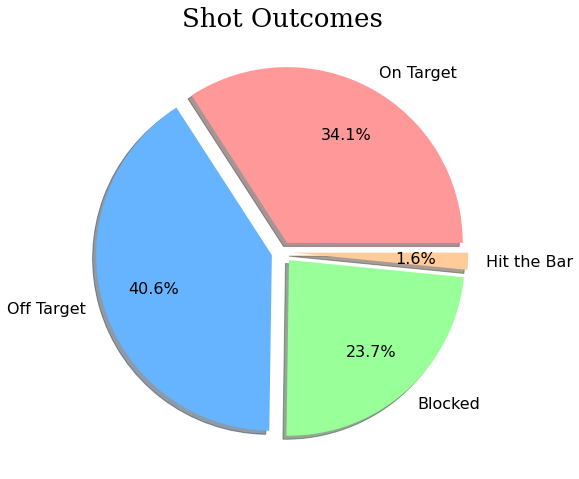

In [15]:
fig, ax = plt.subplots(figsize=[8,8])
labels = pie['shot_outcome']
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
plt.pie(x=pie['count'], autopct="%.1f%%", labels=labels, explode=[0.06]*4, pctdistance=0.7, colors=colors, shadow=True, \
       textprops=dict(fontsize=16))
plt.title("Shot Outcomes", fontsize=26, fontfamily='serif')
plt.tight_layout()
plt.show()

We see that most of the shots are off-target, but the difference with on-target shows is not so large. Of course only a fraction of those on-target shots end up as goals, because there is a goalkeeper trying to prevent goals on the other side.

Now let's explore where shots tend to be placed by the players.

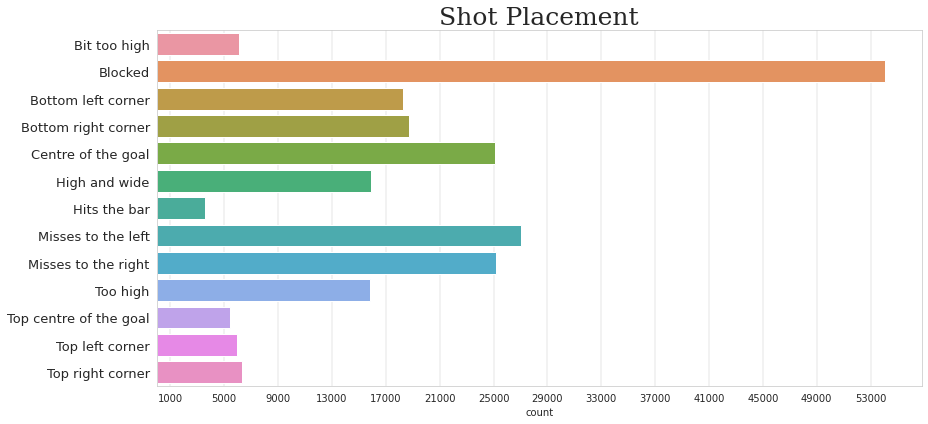

In [16]:
bar = shots[['shot_place', 'id_event']].groupby('shot_place').count().reset_index().rename(columns={'id_event': 'count'})
bar.shot_place = bar.shot_place.astype(int)
bar.shot_place = bar.shot_place.replace({1: 'Bit too high', 2: 'Blocked', 3: 'Bottom left corner', 4: 'Bottom right corner', \
                                        5: 'Centre of the goal', 6: 'High and wide', 7: 'Hits the bar', 8: 'Misses to the left', \
                                        9: 'Misses to the right', 10: 'Too high', 11: 'Top centre of the goal', \
                                        12: 'Top left corner', 13: 'Top right corner'})

sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=[13,6])
labels = bar['shot_place']
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
ax = sns.barplot(x=bar['count'], y=labels)
ax.set_yticklabels(labels, size = 13)
ax.set_xticks(np.arange(1000,57000,4000))
ax.set_ylabel(ylabel='')
plt.title("Shot Placement", fontsize=25, fontfamily='serif')
plt.tight_layout()
ax.grid(color='black', linestyle='-', linewidth=0.1, axis='x')
plt.show()

It can be noted that most of the shots are blocked 

**Analyzing Goals against Time during match**

Text(0.5, 1.0, 'Number of goals against Time during match')

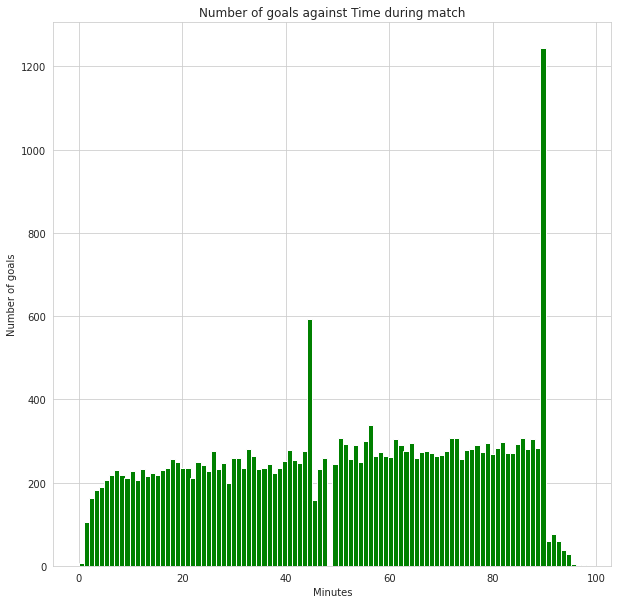

In [17]:
goals=events[events["is_goal"]==1]

fig=plt.figure(figsize=(10,10))
plt.hist(goals.time,width=1,bins=100,color="green")   #100 so 1 bar per minute
plt.xlabel("Minutes")
plt.ylabel("Number of goals")
plt.title("Number of goals against Time during match")

From the above plot it is noted that most goals are scored around the Half-Time (45mins + extra time) and around Full-Time (90mins + extra time)

**Analysing Home/Away goals**

Text(0.5, 1.0, 'Number of goals (by home/away side) against Time during match')

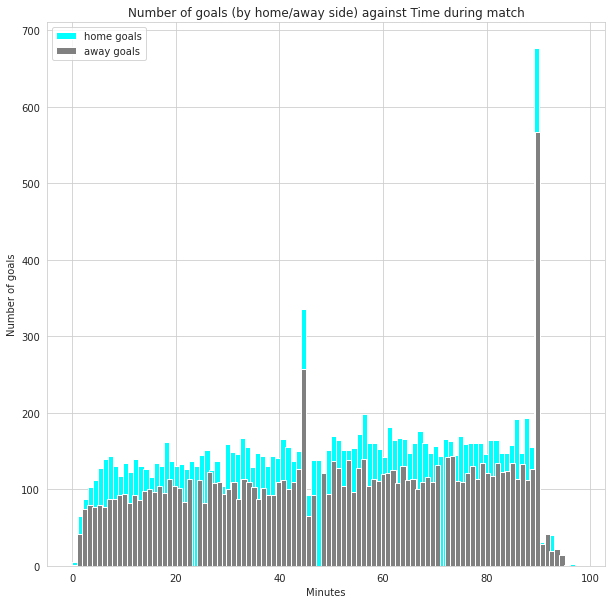

In [18]:
fig=plt.figure(figsize=(10,10))
plt.hist(goals[goals["side"]==1]["time"],width=1,bins=100,color="cyan",label="home goals")   
plt.hist(goals[goals["side"]==2]["time"],width=1,bins=100,color="grey",label="away goals") 
plt.xlabel("Minutes")
plt.ylabel("Number of goals")
plt.legend()
plt.title("Number of goals (by home/away side) against Time during match")

For every minute, most of the goals scored are by the home side
This supports the general notion that the home side has a statistical advantage.

**Analyzing goals (by body parts) against Time during match**

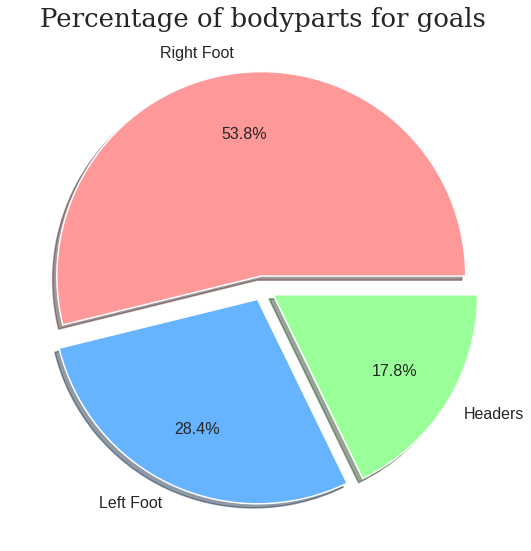

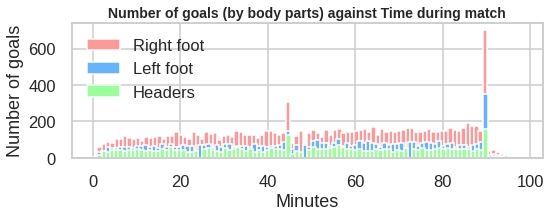

In [74]:


fig, ax = plt.subplots(figsize=[8,8])
labels = ["Right Foot","Left Foot","Headers"]
sizes=[goals[goals["bodypart"]==1].shape[0],goals[goals["bodypart"]==2].shape[0],goals[goals["bodypart"]==3].shape[0]]
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
plt.pie(sizes, autopct="%.1f%%", labels=labels, explode=[0.06]*3, pctdistance=0.7, colors=colors, shadow=True, \
       textprops=dict(fontsize=16))
plt.title("Percentage of bodyparts for goals", fontsize=26, fontfamily='serif')
plt.tight_layout()
plt.show()

plt.subplot(2,1,2)
plt.hist(goals[goals["bodypart"]==1]["time"],width=1,bins=100,color="#ff9999",label="Right foot")   
plt.hist(goals[goals["bodypart"]==2]["time"],width=1,bins=100,color="#66b3ff",label="Left foot") 
plt.hist(goals[goals["bodypart"]==3]["time"],width=1,bins=100,color="#99ff99",label="Headers") 
plt.xlabel("Minutes")
plt.ylabel("Number of goals")
plt.legend()
plt.title("Number of goals (by body parts) against Time during match",fontsize=14,fontweight="bold")
plt.tight_layout()

Most of the goals scored are by Right Footed, then followed by Left Footed and lastly, by Headers.
Perhaps, this might be because the majority of humans are right-footed and, hence, most players are right-footed. 

It is also not surprising that most goals have been scored by foot not head, as after all, soccer is meant to be played by foot.

**Analyzing each situation for goals**

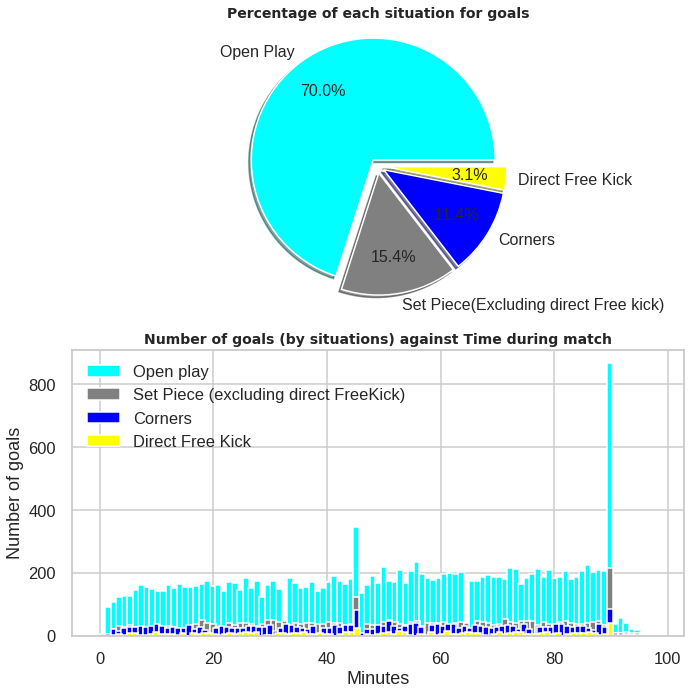

In [76]:
plt.subplot(2,1,1)
labels=["Open Play", "Set Piece(Excluding direct Free kick)","Corners","Direct Free Kick"]
sizes=[goals[goals["situation"]==1].shape[0],goals[goals["situation"]==2].shape[0],goals[goals["situation"]==3].shape[0],goals[goals["situation"]==4].shape[0]]
colors=["cyan","grey","blue","yellow"]
plt.pie(sizes, autopct="%.1f%%", labels=labels, explode=[0.06]*4, pctdistance=0.7, colors=colors, shadow=True, \
       textprops=dict(fontsize=16))
plt.axis('equal')
plt.title("Percentage of each situation for goals",fontname="Times New Roman Bold",fontsize=14,fontweight="bold")
fig=plt.gcf() 
fig.set_size_inches(10,10)

plt.subplot(2,1,2)
plt.hist(goals[goals["situation"]==1]["time"],width=1,bins=100,color="cyan",label="Open play")   
plt.hist(goals[goals["situation"]==2]["time"],width=1,bins=100,color="grey",label="Set Piece (excluding direct FreeKick)") 
plt.hist(goals[goals["situation"]==3]["time"],width=1,bins=100,color="blue",label="Corners") 
plt.hist(goals[goals["situation"]==4]["time"],width=1,bins=100,color="yellow",label="Direct Free Kick") 
plt.xlabel("Minutes")
plt.ylabel("Number of goals")
plt.legend()
plt.title("Number of goals (by situations) against Time during match",fontname="Times New Roman Bold",fontsize=14,fontweight="bold")
plt.tight_layout()

Nearly 70.8% of the goals scored are from Open Play.

**Analyzing each assist type for Goals**

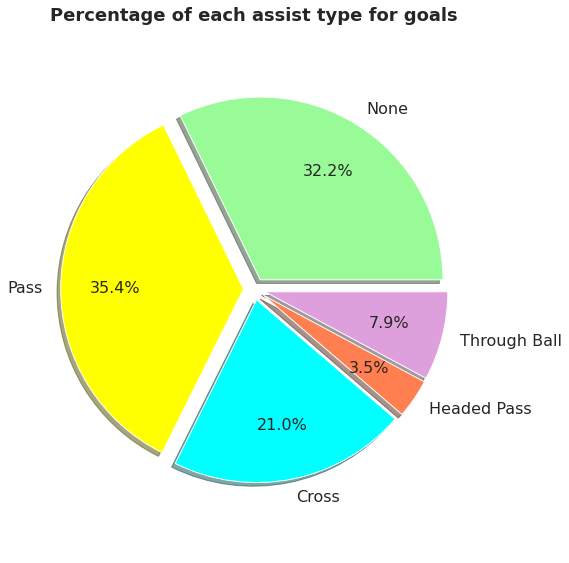

In [21]:

fig, ax = plt.subplots(figsize=[8,8])
labels=["None","Pass","Cross","Headed Pass","Through Ball"]
sizes=[sum(goals["assist_method"]==0),sum(goals["assist_method"]==1),sum(goals["assist_method"]==2),sum(goals["assist_method"]==3),sum(goals["assist_method"]==4)]
colors=["palegreen","yellow","aqua","coral","plum"]
plt.pie(sizes, autopct="%.1f%%", labels=labels, explode=[0.06]*5, pctdistance=0.7, colors=colors, shadow=True, \
       textprops=dict(fontsize=16))
plt.axis('equal')
plt.title("Percentage of each assist type for goals",fontsize=18,fontweight="bold")
plt.tight_layout()
plt.show()


The pie chart shows:

*   About 35.4% of the goals have been assisted by direct passing
*   32.2% of the goals have "No" assist because they might be from penalties or direct free kicks



In [22]:
#events_df = events.merge(info[['id_odsp', 'country', 'date']], on='id_odsp', how='left')

In [23]:
#extract_year = lambda x: datetime.strptime(x, "%Y-%m-%d").year
#events_df['year'] = [extract_year(x) for key, x in enumerate(events_df['date'])]

**Analysing Yellow cards/Red cards**

In [24]:
yel_card=events[events["event_type"]==4]
yel_card.shape

(39911, 22)

Text(0.5, 1.0, 'Number of yellow cards against Time during match')

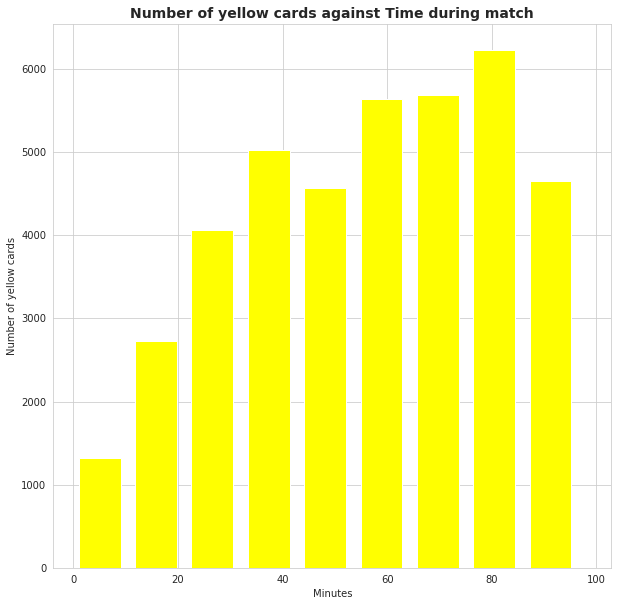

In [25]:
plt.figure(figsize=(10,10))
plt.hist(yel_card.time,width=8,bins=9,color="yellow")   
plt.xlabel("Minutes")
plt.ylabel("Number of yellow cards")
plt.title("Number of yellow cards against Time during match",fontsize=14,fontweight="bold")

In [26]:
sec_yellow=events[events["event_type"]==5]
red=events[events["event_type"]==6]
reds=[sec_yellow,red]
red_cards=pd.concat(reds)
red_cards.event_type.unique()

array([5, 6])

Text(0.5, 1.0, 'Number of red cards against Time during match')

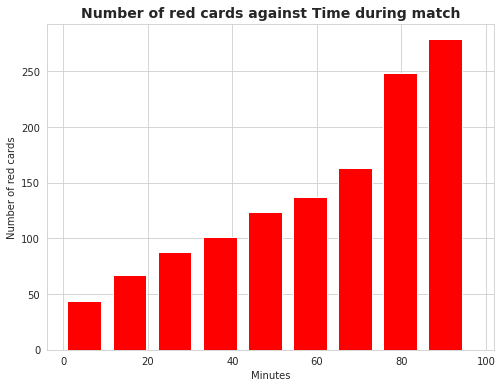

In [27]:
fig=plt.figure(figsize=(8,6))
plt.hist(red_cards.time,width=8,bins=9,color="red")   
plt.xlabel("Minutes")
plt.ylabel("Number of red cards")
plt.title("Number of red cards against Time during match",fontsize=14,fontweight="bold")

# **Data Preprocessing**

***Identify the unique values in each feature.***

In [28]:
events.nunique()

id_odsp            9074
id_event         941009
sort_order          180
time                101
text             366076
event_type           11
event_type2           4
side                  2
event_team          142
opponent            142
player             6118
player2            5747
player_in          5093
player_out         4671
shot_place           13
shot_outcome          4
is_goal               2
location             19
bodypart              3
assist_method         5
situation             4
fast_break            2
dtype: int64

In [29]:
goals=events[events['shot_outcome']==1] #1 is on target
goals=goals[goals['text'].apply(lambda x:'Goal' in x)]
goals.head(2)

,id_odsp,id_event,sort_order,time,text,event_type,event_type2,side,event_team,opponent,player,player2,player_in,player_out,shot_place,shot_outcome,is_goal,location,bodypart,assist_method,situation,fast_break
13,UFot0hit/,UFot0hit14,14,17,"Goal! Borussia Dortmund 1, Hamburg 0. Kevin G...",1,12.0,1,Borussia Dortmund,Hamburg SV,kevin grosskreutz,mario gotze,NaN,NaN,4.0,1.0,1,9.0,2.0,1,1.0,0
26,UFot0hit/,UFot0hit27,27,29,"Goal! Borussia Dortmund 2, Hamburg 0. Mario G...",1,12.0,1,Borussia Dortmund,Hamburg SV,mario gotze,robert lewandowski,NaN,NaN,5.0,1.0,1,3.0,1.0,1,1.0,0


In [30]:
teams=events[['id_odsp','event_team','event_type','location','assist_method','situation']]

In [31]:
yellow=(teams.groupby('event_team')['event_type'].apply(lambda x: (x==4).sum())
       +teams.groupby('event_team')['event_type'].apply(lambda x: (x==5).sum())) #yellow_cards
yellow.head(2)

event_team
AC Ajaccio    238
AC Milan      502
Name: event_type, dtype: int64

In [32]:
red=teams.groupby('event_team')['event_type'].apply(lambda x: (x==6).sum()) #red_cards
red.head(2)

event_team
AC Ajaccio    12
AC Milan      18
Name: event_type, dtype: int64

In [33]:
foul=teams.groupby('event_team')['event_type'].apply(lambda x: (x==3).sum()) #fouls
foul.head(2)

event_team
AC Ajaccio    1593
AC Milan      2677
Name: event_type, dtype: int64

In [34]:
situation=teams.dropna().groupby('event_team')['situation'].value_counts()
situation.head(2)

event_team  situation
AC Ajaccio  1.0          913
            2.0           86
Name: situation, dtype: int64

In [35]:
location=teams.dropna().groupby('event_team')['location'].value_counts()
location.head(2)

event_team  location
AC Ajaccio  15.0        457
            3.0         336
Name: location, dtype: int64

In [36]:
assist_method=teams.dropna().groupby('event_team')['assist_method'].value_counts()
assist_method.head(2)

event_team  assist_method
AC Ajaccio  1                490
            0                344
Name: assist_method, dtype: int64

In [37]:
nb_goals=goals.groupby('event_team')['event_team'].count()
nb_goals.head(2)

event_team
AC Ajaccio    110
AC Milan      320
Name: event_team, dtype: int64

In [38]:
df=pd.concat([yellow,red,foul],axis=1)
df.columns=['yellow','red','foul']
df.head(2)

,yellow,red,foul
event_team,,,
AC Ajaccio,238,12,1593
AC Milan,502,18,2677


In [39]:
d=dict()
for var in ['situation','location','assist_method']:
    un=teams[var].unique().tolist()
    l=[]
    for i in un:
        sample=teams[teams[var]==i]
        l.append(sample.dropna().groupby('event_team')[var].count())
    d[var]=l


In [40]:
df['team']=df.index
df['goals']=nb_goals
df

,yellow,red,foul,team,goals
event_team,,,,,
AC Ajaccio,238,12,1593,AC Ajaccio,110
AC Milan,502,18,2677,AC Milan,320
AJ Auxerre,89,3,558,AJ Auxerre,46
AS Monaco,243,8,1666,AS Monaco,228
AS Nancy Lorraine,160,7,1260,AS Nancy Lorraine,87
...,...,...,...,...,...
Villarreal,393,5,2045,Villarreal,203
Watford,130,4,725,Watford,64
Werder Bremen,375,10,2645,Werder Bremen,249


In [41]:
for var in ['situation','location','assist_method']:
    un=teams[var].unique().tolist()
    l=[]
    for i in range(len(un)):
        df[var+'_'+str(un[i])]=df['team'].map(d[var][i].to_dict())
df

,yellow,red,foul,team,goals,situation_1.0,situation_nan,situation_3.0,situation_4.0,situation_2.0,location_9.0,location_nan,location_2.0,location_4.0,location_15.0,location_1.0,location_3.0,location_5.0,location_11.0,location_13.0,location_16.0,location_17.0,location_7.0,location_8.0,location_12.0,location_10.0,location_19.0,location_6.0,location_14.0,location_18.0,assist_method_1,assist_method_0,assist_method_2,assist_method_3,assist_method_4
event_team,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AC Ajaccio,238,12,1593,AC Ajaccio,110,913,NaN,74,33,86,71,NaN,NaN,NaN,457,NaN,336,NaN,92,27,24.0,20.0,9.0,10.0,12,13,8.0,9.0,15,3.0,490,344,198,43,31.0
AC Milan,502,18,2677,AC Milan,320,2615,NaN,219,87,144,215,NaN,NaN,NaN,1465,NaN,784,NaN,256,93,23.0,19.0,28.0,35.0,29,34,22.0,10.0,51,1.0,1556,865,477,61,106.0
AJ Auxerre,89,3,558,AJ Auxerre,46,364,NaN,41,23,18,48,NaN,NaN,NaN,173,NaN,123,NaN,33,18,5.0,8.0,4.0,4.0,10,10,2.0,6.0,1,1.0,174,144,92,16,20.0
AS Monaco,243,8,1666,AS Monaco,228,1387,NaN,142,50,86,131,NaN,NaN,NaN,607,NaN,558,NaN,128,56,11.0,9.0,19.0,16.0,44,32,18.0,8.0,26,2.0,754,446,363,49,53.0
AS Nancy Lorraine,160,7,1260,AS Nancy Lorraine,87,874,NaN,86,29,69,85,NaN,NaN,NaN,502,NaN,261,NaN,82,28,17.0,16.0,11.0,4.0,14,15,4.0,7.0,10,2.0,523,267,193,42,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Villarreal,393,5,2045,Villarreal,203,1578,NaN,146,42,83,164,NaN,NaN,NaN,709,NaN,512,NaN,191,64,9.0,10.0,35.0,26.0,46,34,11.0,11.0,24,3.0,924,493,295,43,94.0
Watford,130,4,725,Watford,64,574,NaN,46,12,46,53,NaN,NaN,NaN,296,NaN,205,NaN,49,14,1.0,8.0,14.0,6.0,9,9,4.0,1.0,9,NaN,301,213,117,42,5.0
Werder Bremen,375,10,2645,Werder Bremen,249,1912,NaN,208,49,149,184,NaN,NaN,NaN,885,NaN,726,NaN,184,70,34.0,15.0,26.0,31.0,42,50,17.0,24.0,27,3.0,1082,674,415,108,39.0


In [42]:
df.dropna(axis=1, how='all', inplace=True)
df.fillna(0, inplace=True)

***Identify the feature that has null values but keeping them for further processing.***

In [43]:
df.isnull().sum()

yellow             0
red                0
foul               0
team               0
goals              0
situation_1.0      0
situation_3.0      0
situation_4.0      0
situation_2.0      0
location_9.0       0
location_15.0      0
location_3.0       0
location_11.0      0
location_13.0      0
location_16.0      0
location_17.0      0
location_7.0       0
location_8.0       0
location_12.0      0
location_10.0      0
location_19.0      0
location_6.0       0
location_14.0      0
location_18.0      0
assist_method_1    0
assist_method_0    0
assist_method_2    0
assist_method_3    0
assist_method_4    0
dtype: int64

***Remove all decimals in column names.***

In [44]:
for col in df.columns:   
    if col.endswith('.0'):
        col1 = col.replace(".0", "")
    else:
        col1 = col
    df = df.rename(columns={col : col1})   

print(df.columns)

Index(['yellow', 'red', 'foul', 'team', 'goals', 'situation_1', 'situation_3',
       'situation_4', 'situation_2', 'location_9', 'location_15', 'location_3',
       'location_11', 'location_13', 'location_16', 'location_17',
       'location_7', 'location_8', 'location_12', 'location_10', 'location_19',
       'location_6', 'location_14', 'location_18', 'assist_method_1',
       'assist_method_0', 'assist_method_2', 'assist_method_3',
       'assist_method_4'],
      dtype='object')


***Read the Dictionary to decode all parameters and give meaningful columns names.***

In [45]:
f = open(DICT_FILE_PATH, "r")

x = []
k = []
r = []
for lines in f:
    x.append(lines.split())

line_base = x[0][0]

for line in x:
    if len(line) > 1:        
        ll = ''
        for j in range(1, len(line)):
            if j < (len(line) - 1):
                ll = ll + line[j] + ' '
            else:
                ll = ll + line[j]
        k.append([line_base + '_' + line[0], ll])
                
    elif len(line) == 1:
        line_base = line[0]
print(k)

[['event_type_0', 'Announcement'], ['event_type_1', 'Attempt'], ['event_type_2', 'Corner'], ['event_type_3', 'Foul'], ['event_type_4', 'Yellow card'], ['event_type_5', 'Second yellow card'], ['event_type_6', 'Red card'], ['event_type_7', 'Substitution'], ['event_type_8', 'Free kick won'], ['event_type_9', 'Offside'], ['event_type_10', 'Hand ball'], ['event_type_11', 'Penalty conceded'], ['event_type2_12', 'Key Pass'], ['event_type2_13', 'Failed through ball'], ['event_type2_14', 'Sending off'], ['event_type2_15', 'Own goal'], ['side_1', 'Home'], ['side_2', 'Away'], ['shot_place_1', 'Bit too high'], ['shot_place_2', 'Blocked'], ['shot_place_3', 'Bottom left corner'], ['shot_place_4', 'Bottom right corner'], ['shot_place_5', 'Centre of the goal'], ['shot_place_6', 'High and wide'], ['shot_place_7', 'Hits the bar'], ['shot_place_8', 'Misses to the left'], ['shot_place_9', 'Misses to the right'], ['shot_place_10', 'Too high'], ['shot_place_11', 'Top centre of the goal'], ['shot_place_12', 

In [46]:
i = 0
for col in k:    
    if col[0] in df.columns:   
      df= df.rename(columns={col[0] : col[1]})
    
print(df.columns)

Index(['yellow', 'red', 'foul', 'team', 'goals', 'Open play', 'Corner',
       'Free kick', 'Set piece', 'Left side of the box', 'Outside the box',
       'Centre of the box', 'Right side of the box', 'Very close range',
       'Long range', 'More than 35 yards', 'Difficult angle on the left',
       'Difficult angle on the right', 'Right side of the six yard box',
       'Left side of the six yard box', 'Not recorded',
       'Difficult angle and long range', 'Penalty spot', 'More than 40 yards',
       'Pass', 'None', 'Cross', 'Headed pass', 'Through ball'],
      dtype='object')


***Count games for each team (home and away) and normalize all features by the number of games.Merge event and game info datasets into one "data" dataset***

In [47]:
game = info['ht'].value_counts() + info['at'].value_counts()
df['game'] = game
df.head()

,yellow,red,foul,team,goals,Open play,Corner,Free kick,Set piece,Left side of the box,Outside the box,Centre of the box,Right side of the box,Very close range,Long range,More than 35 yards,Difficult angle on the left,Difficult angle on the right,Right side of the six yard box,Left side of the six yard box,Not recorded,Difficult angle and long range,Penalty spot,More than 40 yards,Pass,None,Cross,Headed pass,Through ball,game
event_team,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AC Ajaccio,238,12,1593,AC Ajaccio,110,913,74,33,86,71,457,336,92,27,24.0,20.0,9.0,10.0,12,13,8.0,9.0,15,3.0,490,344,198,43,31.0,114.0
AC Milan,502,18,2677,AC Milan,320,2615,219,87,144,215,1465,784,256,93,23.0,19.0,28.0,35.0,29,34,22.0,10.0,51,1.0,1556,865,477,61,106.0,210.0
AJ Auxerre,89,3,558,AJ Auxerre,46,364,41,23,18,48,173,123,33,18,5.0,8.0,4.0,4.0,10,10,2.0,6.0,1,1.0,174,144,92,16,20.0,38.0
AS Monaco,243,8,1666,AS Monaco,228,1387,142,50,86,131,607,558,128,56,11.0,9.0,19.0,16.0,44,32,18.0,8.0,26,2.0,754,446,363,49,53.0,135.0
AS Nancy Lorraine,160,7,1260,AS Nancy Lorraine,87,874,86,29,69,85,502,261,82,28,17.0,16.0,11.0,4.0,14,15,4.0,7.0,10,2.0,523,267,193,42,33.0,96.0


***As different teams can have a different number of games, we will count games for each team (home and away) and normalize all features by the number of games.***

In [48]:
for i in df.columns: 
    if (type(df[i][0]) == np.float64) | (type(df[i][0]) == np.int64):
        df[i] = df[i].div(game, axis=0)

In [49]:
df.head()

,yellow,red,foul,team,goals,Open play,Corner,Free kick,Set piece,Left side of the box,Outside the box,Centre of the box,Right side of the box,Very close range,Long range,More than 35 yards,Difficult angle on the left,Difficult angle on the right,Right side of the six yard box,Left side of the six yard box,Not recorded,Difficult angle and long range,Penalty spot,More than 40 yards,Pass,None,Cross,Headed pass,Through ball,game
event_team,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AC Ajaccio,2.087719,0.105263,13.973684,AC Ajaccio,0.964912,8.008772,0.649123,0.289474,0.754386,0.622807,4.008772,2.947368,0.807018,0.236842,0.210526,0.175439,0.078947,0.087719,0.105263,0.114035,0.070175,0.078947,0.131579,0.026316,4.298246,3.017544,1.736842,0.377193,0.271930,1.0
AC Milan,2.390476,0.085714,12.747619,AC Milan,1.523810,12.452381,1.042857,0.414286,0.685714,1.023810,6.976190,3.733333,1.219048,0.442857,0.109524,0.090476,0.133333,0.166667,0.138095,0.161905,0.104762,0.047619,0.242857,0.004762,7.409524,4.119048,2.271429,0.290476,0.504762,1.0
AJ Auxerre,2.342105,0.078947,14.684211,AJ Auxerre,1.210526,9.578947,1.078947,0.605263,0.473684,1.263158,4.552632,3.236842,0.868421,0.473684,0.131579,0.210526,0.105263,0.105263,0.263158,0.263158,0.052632,0.157895,0.026316,0.026316,4.578947,3.789474,2.421053,0.421053,0.526316,1.0
AS Monaco,1.800000,0.059259,12.340741,AS Monaco,1.688889,10.274074,1.051852,0.370370,0.637037,0.970370,4.496296,4.133333,0.948148,0.414815,0.081481,0.066667,0.140741,0.118519,0.325926,0.237037,0.133333,0.059259,0.192593,0.014815,5.585185,3.303704,2.688889,0.362963,0.392593,1.0
AS Nancy Lorraine,1.666667,0.072917,13.125000,AS Nancy Lorraine,0.906250,9.104167,0.895833,0.302083,0.718750,0.885417,5.229167,2.718750,0.854167,0.291667,0.177083,0.166667,0.114583,0.041667,0.145833,0.156250,0.041667,0.072917,0.104167,0.020833,5.447917,2.781250,2.010417,0.437500,0.343750,1.0


In [50]:
df.isnull().sum()

yellow                            0
red                               0
foul                              0
team                              0
goals                             0
Open play                         0
Corner                            0
Free kick                         0
Set piece                         0
Left side of the box              0
Outside the box                   0
Centre of the box                 0
Right side of the box             0
Very close range                  0
Long range                        0
More than 35 yards                0
Difficult angle on the left       0
Difficult angle on the right      0
Right side of the six yard box    0
Left side of the six yard box     0
Not recorded                      0
Difficult angle and long range    0
Penalty spot                      0
More than 40 yards                0
Pass                              0
None                              0
Cross                             0
Headed pass                 

***Again identify the unnecessary columns and drop them***

In [51]:
df.drop(['game'], axis=1, inplace=True)

***No point to distinguish Playing style by right or left, hence combining the same.***

In [52]:
def column_sum(a,b):
    c = df[[a,b]].sum(axis=1)    
    df.drop([a,b], axis=1, inplace=True)
    return c    

In [53]:
#data1['Foot'] = column_sum('right foot','left foot')
#data1['Wing'] = column_sum('Right wing','Left wing')
df['Difficult angle'] = column_sum('Difficult angle on the left','Difficult angle on the right')
df['Side of the box'] = column_sum('Left side of the box','Right side of the box')
df['Side of the six yard box'] = column_sum('Left side of the six yard box','Right side of the six yard box')

***Rename the new features.***

In [54]:
df.rename(columns={'yellow': 'Yellow Card'}, inplace = True) 
df.rename(columns={'red': 'Red Card'}, inplace = True) 
df.rename(columns={'foul': 'Foul'}, inplace = True) 
df.rename(columns={'goals': 'Goals'}, inplace = True) 

In [55]:
df.shape

(142, 26)

# **Data Visualization - Mostly Features** 

***Univariate Analysis on each feature using Histogram***

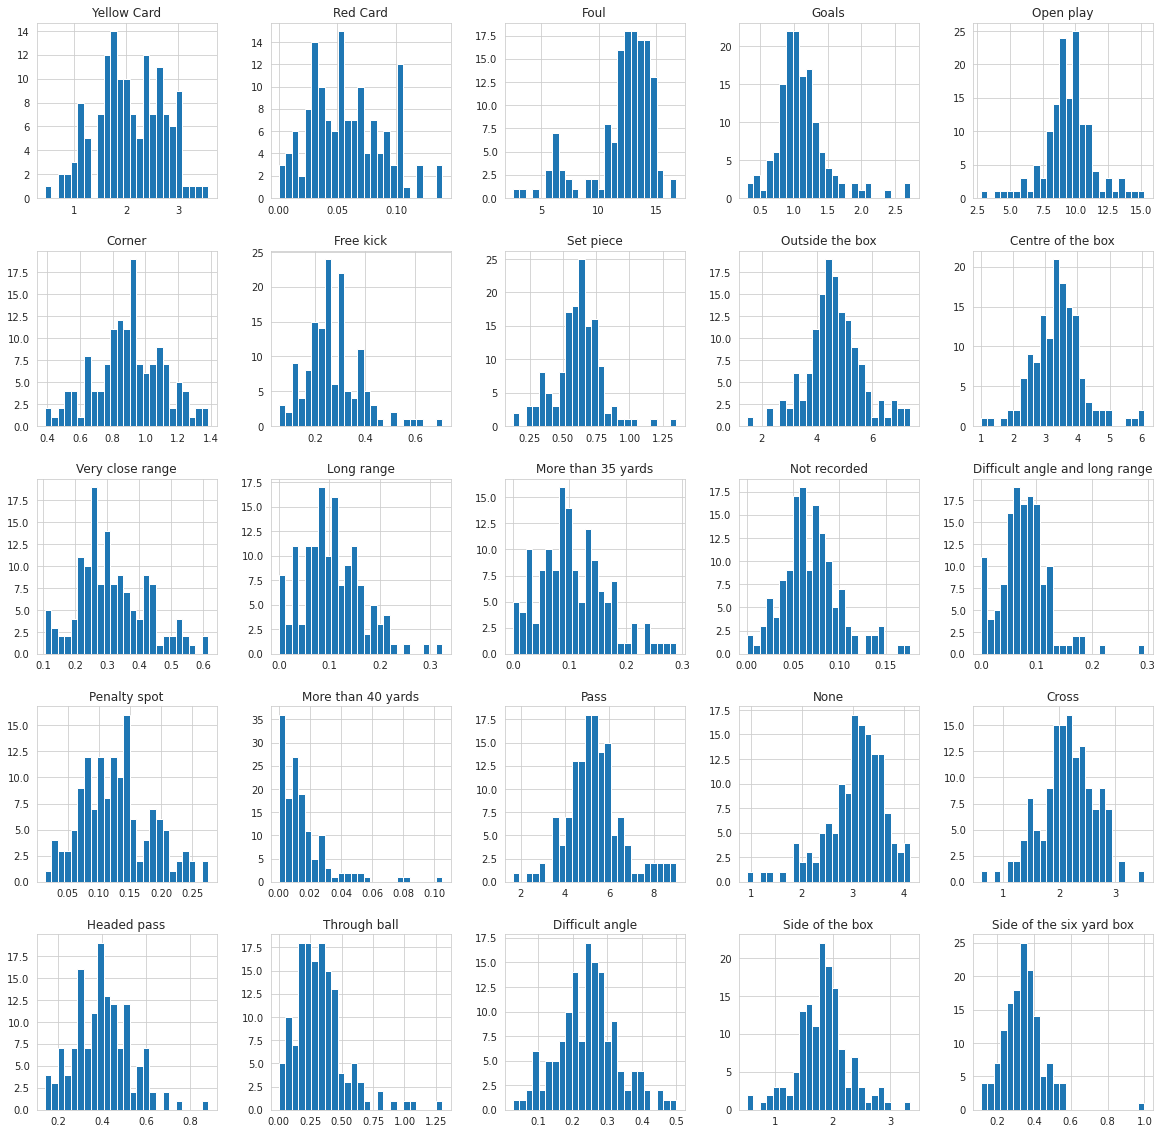

In [56]:
df.hist(figsize=(20,20), bins=25);

***II. Correlation Plot - HeatMap between Features***

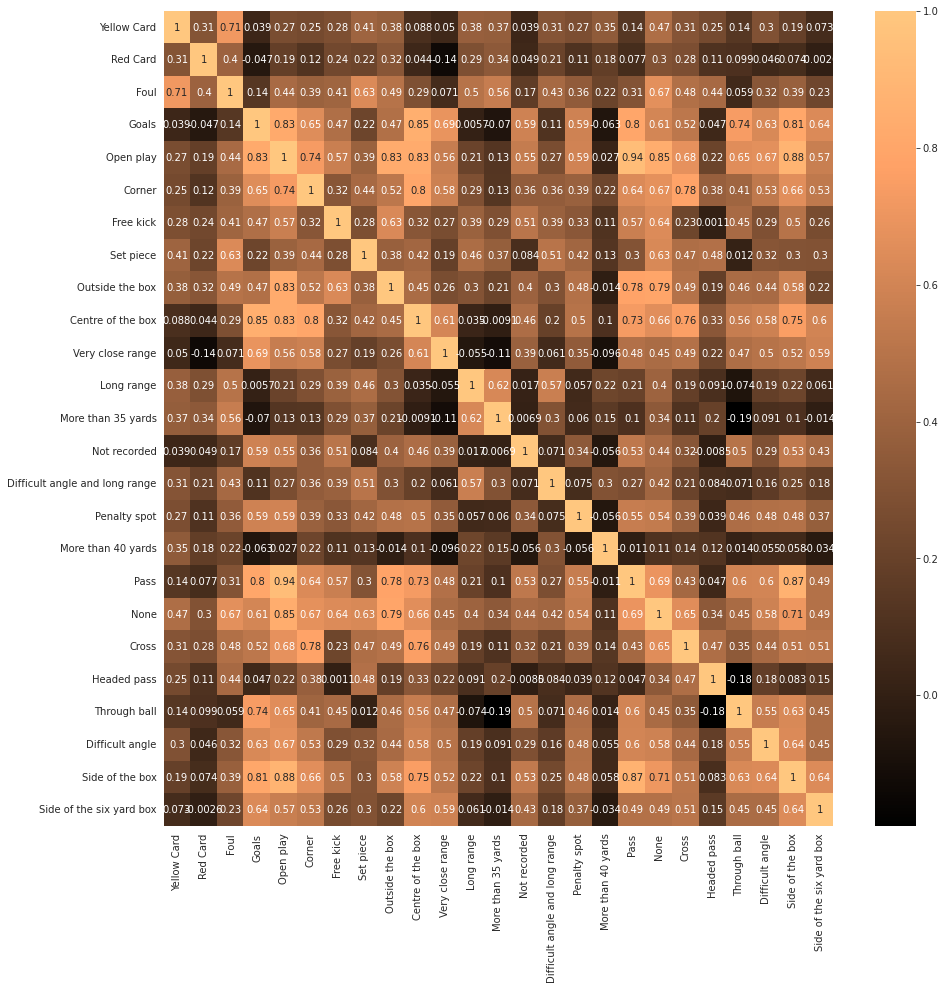

In [57]:
correlation = df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(correlation, cmap="copper", annot = True)
plt.show()


From the above correlation matrix and using certain domain knowledge, we will pick Red Card, yellow Card and Foul



# **Preparing data for Modelling.**

In [58]:
#X=df[['Red Card', 'Goals','Foul']]
#col_names =['Red Card', 'Goals','Foul']

X=df[['Red Card', 'Goals']]
col_names =['Red Card', 'Goals']

***Scaling and translating each feature individually  in the given range of 0 to 1 on the training set.***

In [59]:
scalar = MinMaxScaler()
X[col_names] = scalar.fit_transform(X)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


## K-Means Clustering

**Silhouette Analysis to find optimal number of cluster**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Silhouette score')

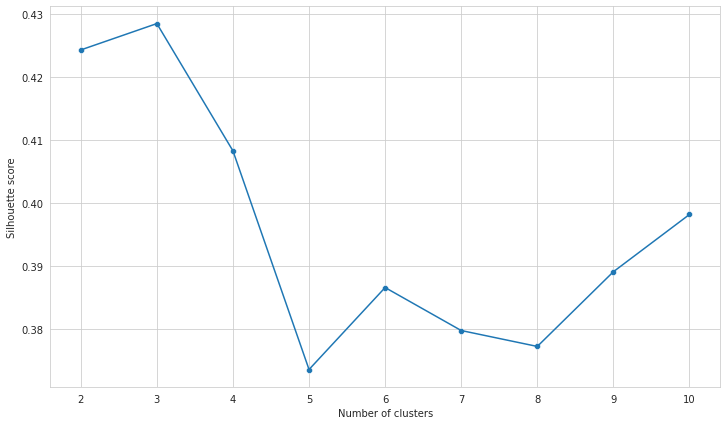

In [60]:
# Calculating the Sillhoutte Score

silhouette_scores = []
number_of_cluster = range(2, 11)

for i in number_of_cluster:
  kmeans = KMeans(n_clusters=i, random_state=0)
  kmeans.fit(X)

  labels = kmeans.labels_
  silhouette_scores.append(silhouette_score(X, labels, metric = 'euclidean', random_state=0))


# Plotting the Sillhoutte Score
plt.figure(figsize=(12,7))

sns.lineplot(number_of_cluster, silhouette_scores)
sns.scatterplot(number_of_cluster, silhouette_scores)

plt.xticks(number_of_cluster)

plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')

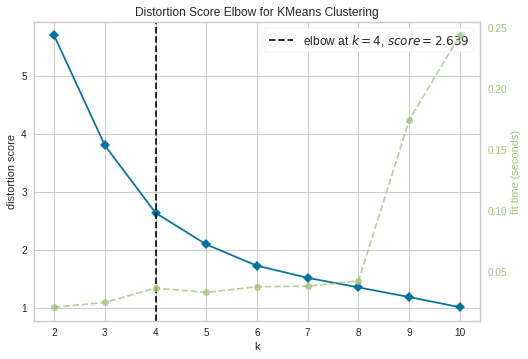

In [61]:
from yellowbrick.cluster import KElbowVisualizer

km = KMeans(random_state=42)
visualizer = KElbowVisualizer(km, k=(2,11))
 
visualizer.fit(X)        
visualizer.show()  ;     

optimal number of clusters is estimated to be 4

In [62]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

X['kmeans_clust'] = kmeans.predict(X)
X

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Red Card,Goals,kmeans_clust
event_team,,,
AC Ajaccio,0.754386,0.273919,1
AC Milan,0.614286,0.503557,0
AJ Auxerre,0.565789,0.374836,0
AS Monaco,0.424691,0.571385,0
AS Nancy Lorraine,0.522569,0.249816,0
...,...,...,...
Villarreal,0.209552,0.365225,3
Watford,0.477778,0.315727,0
Werder Bremen,0.383244,0.424562,0


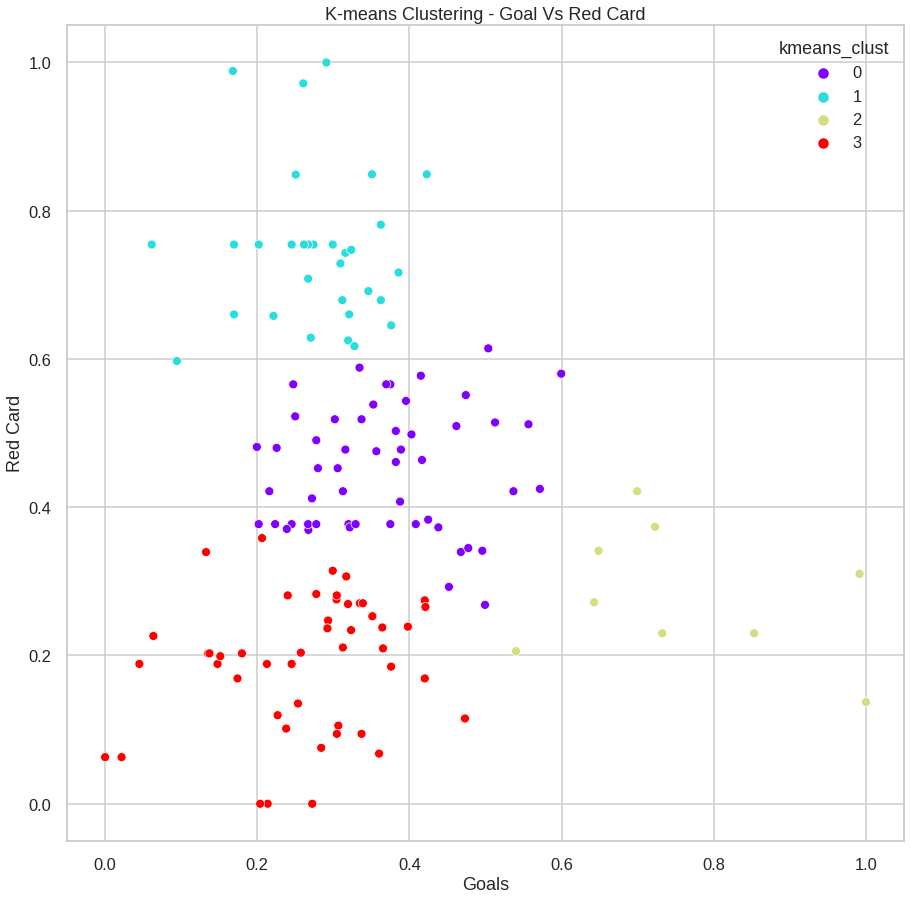

In [63]:
sns.set_context('talk')
plt.figure(figsize=(15,15))
sns.scatterplot(x=X['Goals'],y=X['Red Card'],hue=X['kmeans_clust'], palette='rainbow')
plt.title('K-means Clustering - Goal Vs Red Card')
plt.show()

From the above scatterplot, following clusters can be inferenced:-

*   Cluster 0 - Team with Less Goal and Less Red Cards
*   Cluster 1 - Team with Average Goals and Average number of Red Cards
*   Cluster 2 - Teams with more Goals and less Red Cards - This indicates an Good Team
*   Cluster 3 - Teams with Less Goals but highest number of Red Cards. This team calls  for a special attention for a good coach.  

# **Apply Gaussian Clustering using SKLEARN lib**

**Silhouette analysis to find optimal number of cluster**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Silhouette score')

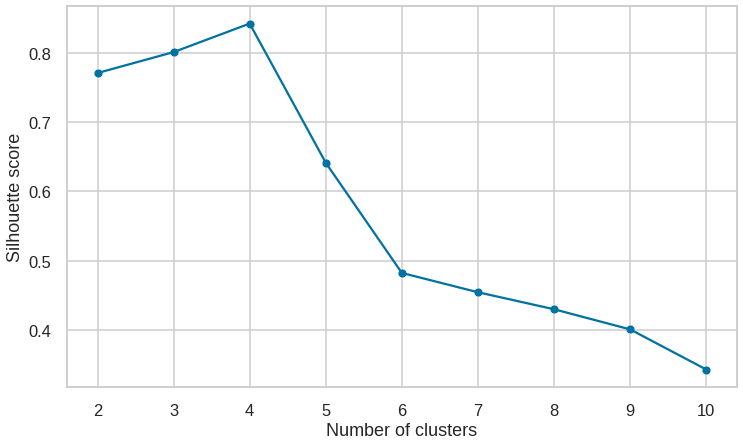

In [64]:
# Calculating the Sillhoutte Score

from sklearn.metrics import silhouette_score

silhouette_scores = []
number_of_cluster = range(2, 11)

for i in number_of_cluster:
  gmm = GaussianMixture(n_components=i, random_state=0)
  gmm.fit(X)

  labels = gmm.predict(X)
  silhouette_scores.append(silhouette_score(X, labels, metric = 'euclidean', random_state=0))


# Plotting the Sillhoutte Score
plt.figure(figsize=(12,7))

sns.lineplot(number_of_cluster, silhouette_scores)
sns.scatterplot(number_of_cluster, silhouette_scores)

plt.xticks(number_of_cluster)

plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')

In [65]:
gmm = GaussianMixture(n_components=4)
gmm.fit(X)

GaussianMixture(n_components=4)

In [66]:
X['gmm_cluster'] = gmm.predict(X)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


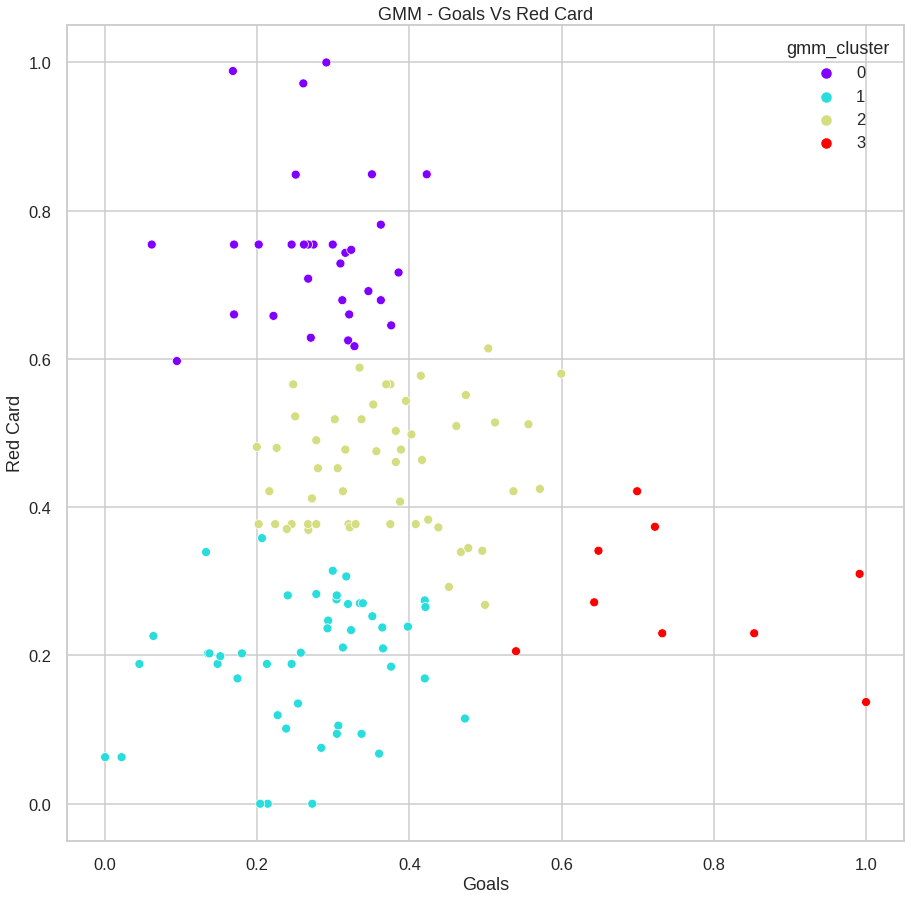

In [67]:
sns.set_context('talk')
plt.figure(figsize=(15,15))
sns.scatterplot(x=X['Goals'],y=X['Red Card'],hue=X['gmm_cluster'], palette='rainbow')
plt.title('GMM - Goals Vs Red Card')
plt.show()

From the above scatterplot, following clusters can be inferenced:-

*   Cluster 0 - Team with Less Goal and Less Red Cards
*   Cluster 1 - Team with Average Goals and Average number of Red Cards
*   Cluster 2 - Teams with more Goals and less Red Cards - This indicates an Good Team
*   Cluster 3 - Teams with Less Goals but highest number of Red Cards. This team calls  for a special attention for a good coach.  

The K-means and Gaussian Misture provides a similar results for inference.

# **B. Apply DBSCAN using SKLEARN lib**

In [68]:
from sklearn.cluster import DBSCAN

In [69]:
# Compute DBSCAN
for eps in [i/10 for i in range(4,9)]:
  for min_samples in range(4,9):
    print("\neps={}".format(eps))
    print("min_samples={}".format(min_samples))
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(X)
    silh = silhouette_score(X, labels)
    print("Clusters present: {}".format(np.unique(labels)))
    print("Cluster sizes: {}".format(np.bincount(labels + 1)))
    print("Silhouette Score: {}".format(silh))


eps=0.4
min_samples=4
Clusters present: [0 1 2 3]
Cluster sizes: [ 0 32 53 48  9]
Silhouette Score: 0.9240101268457599

eps=0.4
min_samples=5
Clusters present: [0 1 2 3]
Cluster sizes: [ 0 32 53 48  9]
Silhouette Score: 0.9240101268457599

eps=0.4
min_samples=6
Clusters present: [0 1 2 3]
Cluster sizes: [ 0 32 53 48  9]
Silhouette Score: 0.9240101268457599

eps=0.4
min_samples=7
Clusters present: [0 1 2 3]
Cluster sizes: [ 0 32 53 48  9]
Silhouette Score: 0.9240101268457599

eps=0.4
min_samples=8
Clusters present: [0 1 2 3]
Cluster sizes: [ 0 32 53 48  9]
Silhouette Score: 0.9240101268457599

eps=0.5
min_samples=4
Clusters present: [0 1 2 3]
Cluster sizes: [ 0 32 53 48  9]
Silhouette Score: 0.9240101268457599

eps=0.5
min_samples=5
Clusters present: [0 1 2 3]
Cluster sizes: [ 0 32 53 48  9]
Silhouette Score: 0.9240101268457599

eps=0.5
min_samples=6
Clusters present: [0 1 2 3]
Cluster sizes: [ 0 32 53 48  9]
Silhouette Score: 0.9240101268457599

eps=0.5
min_samples=7
Clusters present:

In [70]:
#0.7 8
dbscan = DBSCAN(eps = 0.4, min_samples=4)
X['db_clust'] = dbscan.fit_predict(X)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [71]:
X['db_clust'].value_counts()

1    53
2    48
0    32
3     9
Name: db_clust, dtype: int64

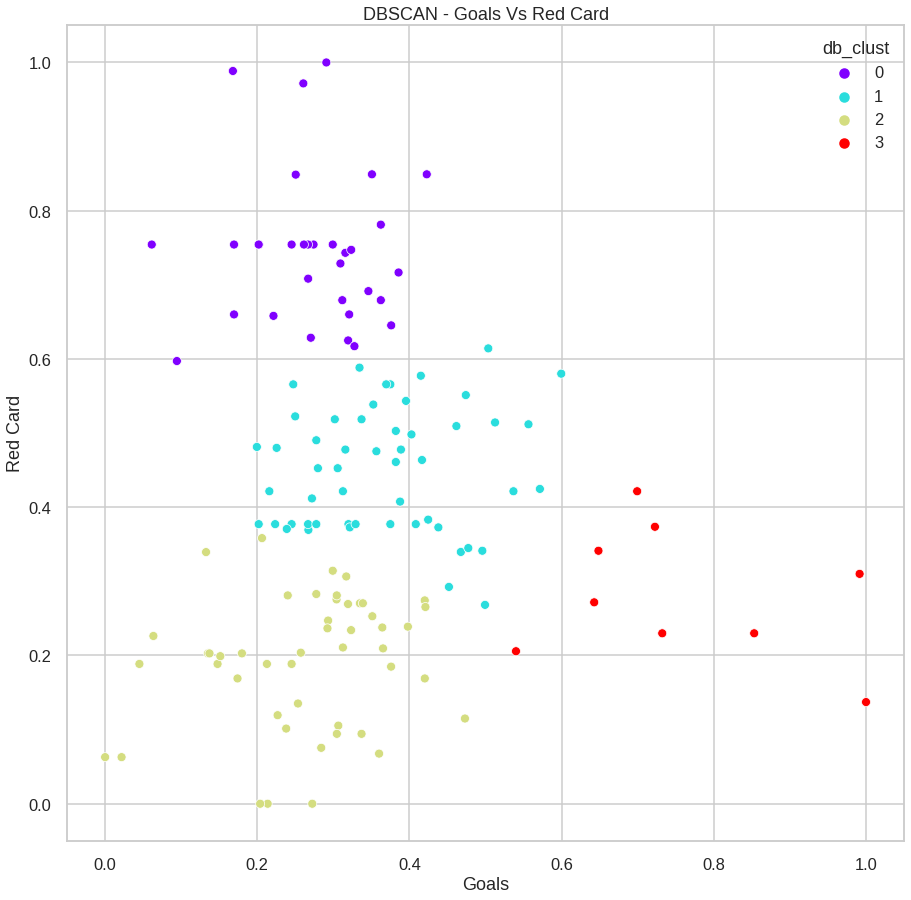

In [72]:
sns.set_context('talk')
plt.figure(figsize=(15,15))
sns.scatterplot(x=X['Goals'],y=X['Red Card'],hue=X['db_clust'], palette='rainbow')
plt.title('DBSCAN - Goals Vs Red Card')
plt.show()

From the above scatterplot, following clusters can be inferenced:-

*   Cluster 0 - Team with Less Goal and Less Red Cards
*   Cluster 1 - Team with Average Goals and Average number of Red Cards
*   Cluster 2 - Teams with more Goals and less Red Cards - This indicates an Good Team
*   Cluster 3 - Teams with Less Goals but highest number of Red Cards. This team calls  for a special attention for a good coach.  

The K-means,Gaussian Mixture and DBSCAN provides a similar results for inference.